In [69]:
import pickle
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [65]:
with open('results/best_prob_estimate.pickle', 'rb') as f:
    sk_probs = pickle.load(f)
    f.close()

In [66]:
with open('results/nn_prob_estimates.pickle', 'rb') as f:
    nn_probs = pickle.load(f)
    f.close()

In [67]:
probs = sk_probs.join(nn_probs, how='left', lsuffix='_log', rsuffix='_nn')
probs['features'] = probs.index

In [68]:
probs.head(30)

,prob_log,prob_nn,features
feat,,,
specialty_anesthesiology,0.883438,0.476728,specialty_anesthesiology
specialty_interventional_pain_management,0.881784,0.520230,specialty_interventional_pain_management
specialty_rheumatology,0.869178,0.529267,specialty_rheumatology
specialty_pain_management,0.867659,0.542507,specialty_pain_management
carisoprodol,0.862213,0.683093,carisoprodol
specialty_infectious_disease,0.846161,0.548400,specialty_infectious_disease
specialty_hematology_oncology,0.838012,0.470530,specialty_hematology_oncology
hydroxychloroquine_sulfate,0.837919,0.548290,hydroxychloroquine_sulfate
specialty_physical_medicine_and_rehabilitation,0.830444,0.465988,specialty_physical_medicine_and_rehabilitation


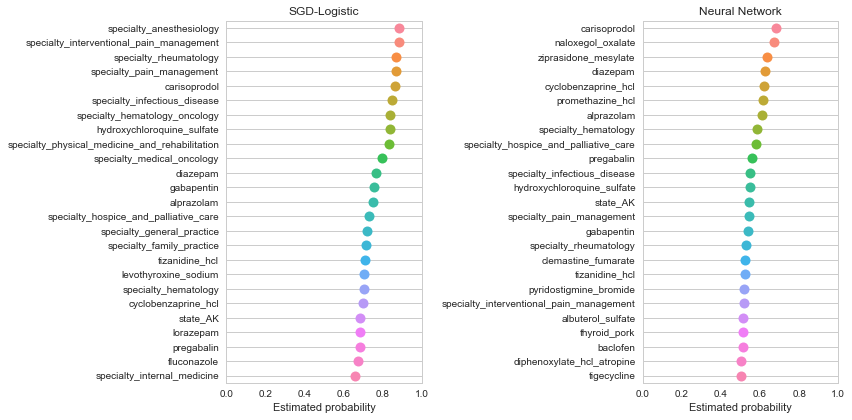

In [62]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
g=sns.stripplot(data=probs.sort_values(by='prob_log', ascending=False)[:25], 
                y='features', x='prob_log', edgecolor="gray", size=10)
g.set(xlim=(0, 1.0), xlabel="Estimated probability", ylabel="")
ax1.set(title='SGD-Logistic')
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)

ax2=plt.subplot(1, 2, 2)
g=sns.stripplot(data=probs.sort_values(by='prob_nn', ascending=False)[:25], 
                y='features', x='prob_nn', edgecolor="gray", size=10)
g.set(xlim=(0, 1.0), xlabel="Estimated probability", ylabel="")
ax2.set(title='Neural Network')
ax2.xaxis.grid(False)
ax2.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [73]:
import numpy as np
left = list(probs.sort_values(by='prob_log', ascending=False)[:25].index)
right = list(probs.sort_values(by='prob_nn', ascending=False)[:25].index)
np.intersect1d(left, right)

array(['alprazolam', 'carisoprodol', 'cyclobenzaprine_hcl', 'diazepam',
       'gabapentin', 'hydroxychloroquine_sulfate', 'pregabalin',
       'specialty_hematology', 'specialty_hospice_and_palliative_care',
       'specialty_infectious_disease',
       'specialty_interventional_pain_management',
       'specialty_pain_management', 'specialty_rheumatology', 'state_AK',
       'tizanidine_hcl'], 
      dtype='<U46')